In [1]:
from canvasapi import Canvas
import json
#setup some global variables for the script

# load API_KEY from a file
# we doing this so that we can share this code without sharing our secret keys
API_KEY=open(".canvas_api_key").readline().rstrip('\n')
API_URL = "https://canvas.ubc.ca"

# COURSE_NUM = 30739 # HackUBC course ID
# Here we create the canvas python object, we use that to interact with the Canvas API
canvas = Canvas(API_URL, API_KEY)

In [3]:
import pandas as pd
import json


In [11]:
user = canvas.get_user('self')
courses = user.get_courses(enrollment_status = 'active')
course_ids = []

for c in courses:
    if('access_restricted_by_date' in c.to_json()):
        continue
    else:
        print(c.id)
        course_ids.append(c.id)
    
print(course_ids)

30739
18688
18746
18770
18953
[30739, 18688, 18746, 18770, 18953]


In [38]:
all_users = []
for eachid in course_ids:
    course = canvas.get_course(eachid)
    users = course.get_users(enrollment_type = ['student'])
    print(users)
    for i in users:
        print(i)
#         all_users.extend(i)
#         all_users = all_users.append(i)
        all_users.append(i.short_name)
#     all_users.extend(users)

    


<PaginatedList of type User>
Farshid Agharebparast (185967)
Kunal Aildasani (15111)
Gagan Bhatia (36937)
Kofi Buahin (48413)
Cindy Cen (82974)
Farbod Chamanian (150707)
Lily Chen (15386)
Tianzong Chen (2516)
Erica Choi (32576)
Abigail Climacosa (15854)
Erica Commons (118474)
Tasha Coote (197947)
Brooke Dai (91607)
Mary Datan (159303)
Zi Rui Ding (91745)
Homen Feng (103824)
Jorge Flores (148295)
John Paul Francisco (25465)
Arwa Gazzaz (86134)
Alexandra Gil (24988)
Ao Lin Gong (39130)
Michelle Gu (139267)
Nakul Gupta (222692)
Shubham Gupta (43103)
Dhiraj Hariramani (84839)
Emily Hon (212301)
Gina Hong (25249)
Mery Hu Zhao (39951)
Julie Huang (15990)
Jessica Huh (148670)
Nicole Huynh (12473)
JungWook Jang (152730)
Elham E Khoda (15624)
Jiwon Kim (63487)
Millenia Kitikul (50754)
Peter Ko (108134)
Kristo Krugger (139302)
Alan Lau (21594)
Harrison Lee (4155)
Sein Lee (33333)
Tony Lee (362123)
Winnie LI (34986)
Luanna Lin (23995)
Andrew Liu (4190)
Daniel Liu (117279)
Fiana Liu (104016)
Jerry 

In [39]:
print(all_users)

['Farshid Agharebparast', 'Kunal Aildasani', 'Gagan Bhatia', 'Kofi Buahin', 'Cindy Cen', 'Farbod Chamanian', 'Lily Chen', 'Tianzong Chen', 'Erica Choi', 'Abigail Climacosa', 'Erica Commons', 'Tasha Coote', 'Brooke Dai', 'Mary Datan', 'Zi Rui Ding', 'Homen Feng', 'Jorge Flores', 'John Paul Francisco', 'Arwa Gazzaz', 'Alexandra Gil', 'Ao Lin Gong', 'Michelle Gu', 'Nakul Gupta', 'Shubham Gupta', 'Dhiraj Hariramani', 'Emily Hon', 'Gina Hong', 'Mery Hu Zhao', 'Julie Huang', 'Jessica Huh', 'Nicole Huynh', 'JungWook Jang', 'Elham E Khoda', 'Jiwon Kim', 'Millenia Kitikul', 'Peter Ko', 'Kristo Krugger', 'Alan Lau', 'Harrison Lee', 'Sein Lee', 'Tony Lee', 'Winnie LI', 'Luanna Lin', 'Andrew Liu', 'Daniel Liu', 'Fiana Liu', 'Jerry Liu', 'Xinyu Liu', 'Dingfei Lu', 'EMMA LU', 'KEVIN LUZONG', 'Michelle Ma', 'Nils Maetzel', 'Dhruv Mahajan', 'Tarang Mahapatra', 'Aliya Mohamed', 'Eduardo Muntaner Garcia', 'Munkhtur Myagmar', 'Shivani Mysuria', 'Aaron Ngu Ngu', 'Thai Nguyen Dinh', 'Michael Oliver', 'Davi

In [40]:
df = pd.DataFrame(all_users)
df.to_csv('all_users.csv', header=True, index=False)

In [42]:
df

,0
0,Farshid Agharebparast
1,Kunal Aildasani
2,Gagan Bhatia
3,Kofi Buahin
4,Cindy Cen
5,Farbod Chamanian
6,Lily Chen
7,Tianzong Chen
8,Erica Choi
9,Abigail Climacosa


In [43]:
f = df[0].value_counts().reset_index()
f.columns = ['user_name', 'count'] 
# rename and save to csv
f.to_csv('f.csv', header=True, index=False)
print(f)

                       user_name  count
0                      Xindi Wei      5
1                 Takeshi Kimura      3
2                      David Liu      3
3                   Xiaojie Zhou      3
4                   Chris Bolton      3
5                        EMMA LU      2
6                     Kevin Dhir      2
7    Pablo Arellano Sanchez Lara      2
8                    Wilkin Chou      2
9                     Jason Kwon      2
10                  Xiaojun Zhan      2
11                   Victor Tang      2
12                      Yuang Wu      2
13               Alejandro Field      2
14                      Jenny Xu      2
15                 Jinghan Huang      2
16            Spencer Richardson      2
17                       Koby Qu      2
18                  Robin Chohan      2
19                   Ziqing Zhou      2
20                    Bobby Gill      2
21                      Enbo Luo      2
22                 William Huang      2
23                 ZHENGYING YAO      2


In [46]:
friend = f.head(6)

In [47]:
friend

,user_name,count
0,Xindi Wei,5
1,Takeshi Kimura,3
2,David Liu,3
3,Xiaojie Zhou,3
4,Chris Bolton,3
5,EMMA LU,2


In [48]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# this is used to fix a warning about future versions of pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

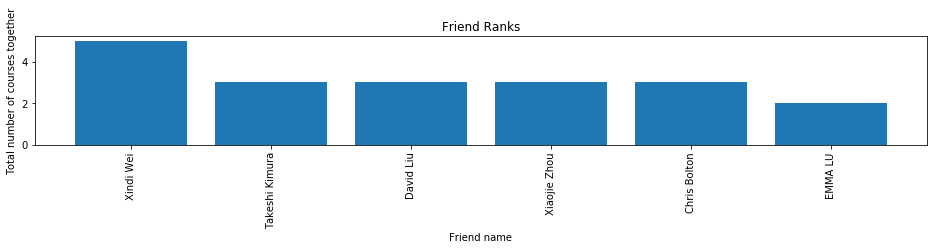

In [50]:
plt.figure(figsize=(16,2))
plt.bar(friend['user_name'], friend['count'])
plt.title("Friend Ranks")
plt.xlabel("Friend name") 
plt.xticks(rotation=90)
plt.ylabel("Total number of courses together")
plt.show()